### Start a spark session

In [37]:
import os
os.environ["_JAVA_OPTIONS"] = "-Djava.security.manager=allow"

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .config("spark.jars.packages", "io.delta:delta-sharing-spark_2.12:3.3.0") \
    .getOrCreate()

### List Tables
Use the provided config

In [38]:
import delta_sharing
config = "config.share"
client = delta_sharing.SharingClient(config)
client.list_all_tables()

[Table(name='ev3_device_data', share='start_hack_2025', schema='start_hack_2025'),
 Table(name='cc_api_logs', share='start_hack_2025', schema='start_hack_2025'),
 Table(name='ev3_dataprofile', share='start_hack_2025', schema='start_hack_2025')]

### Table 1
Energyvalve 3 dataprofile describing the datapoints found in the device data table.

In [39]:
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_dataprofile").limit(3)
df.toPandas()

25/03/19 23:02:51 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_dataprofile_fbcf4ba6a021707ee87d3b8b548e612345a084122031faa972b3ecb013bd036a/_delta_log/00000000000000000000.json.
25/03/19 23:02:51 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_dataprofile_fbcf4ba6a021707ee87d3b8b548e612345a084122031faa972b3ecb013bd036a/_delta_log.


,id,access,basetype,description,format,name,privacy,restriction,definedBy,unit
0,evcloud.00009,r,int,Valve Type,application/vnd.belimo.enum;0|1,ValveType,False,uint8,evcloud/1.2,None
1,evcloud.10,r,int,DN Size of Valve,None,DN_Size,False,int32,evcloud/1.2,None
2,evcloud.100,r,real,Relative Flow in %,None,RelFlow_Fb_Rel2Vmax,False,"[-2147483.648,2147483.647]",evcloud/1.2,percent


### Table 2
Energyvalve 3 device data. **Big data** list of timeseries samples for devices. Devices are differentiated by the **device_id** column.

In [40]:
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data").limit(3)
df.toPandas()

25/03/19 23:02:53 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_b6246cb0b36df100d2465f85fd441e05916581968a770c3b475b800f707dceab/_delta_log/00000000000000000000.json.
25/03/19 23:02:53 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_b6246cb0b36df100d2465f85fd441e05916581968a770c3b475b800f707dceab/_delta_log.
                                                                                

,device_id,dataprofile_id,cloud_received_time,sample_time,year,year_month,year_month_day,influx_migration_source_filename,T1_remote_K,T2_embeded_K,...,SpDeltaT_applied_K,Error_Status_Cloud,DDC_BUS_Sp_Write,dT_Manager_Ste,Active_dT_Manager_total_h,DeltaT_K,DDC_Sp_V,OperatingHours,Flow_Volume_total_m3,Y3AnalogInputValue
0,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-09 11:40:34.098,2019-06-09 11:38:32.312,2019,201906,20190609,2019-06-09_09.gz,349.924869,323.425260,...,10.0,0.0,91.900002,2,0.0,26.499609,4.940656e-324,2278.438304,9454.135186,NaN
1,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-19 01:18:23.274,2019-06-19 01:17:21.806,2019,201906,20190618,2019-06-18_23.gz,349.945812,323.440885,...,5.0,0.0,19.700001,2,0.0,26.504926,4.940656e-324,2508.085700,10513.017983,NaN
2,15cbf304-2834-4523-81d1-45c0bbc0f849,energyvalve3/1.11,2019-06-17 05:36:49.933,2019-06-17 05:33:48.073,2019,201906,20190617,2019-06-17_03.gz,351.181414,324.487760,...,5.0,0.0,31.400000,2,0.0,26.693653,1.361569e-04,2484.714193,35993.262013,NaN


### Plot
Heat Exchanger Characteristic

25/03/19 23:03:15 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_6c7f6f48953ad565ca1df276d8e29412cb073887aa19e36f0d19de283adbb6dd/_delta_log/00000000000000000000.json.
25/03/19 23:03:15 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_6c7f6f48953ad565ca1df276d8e29412cb073887aa19e36f0d19de283adbb6dd/_delta_log.
                                                                                

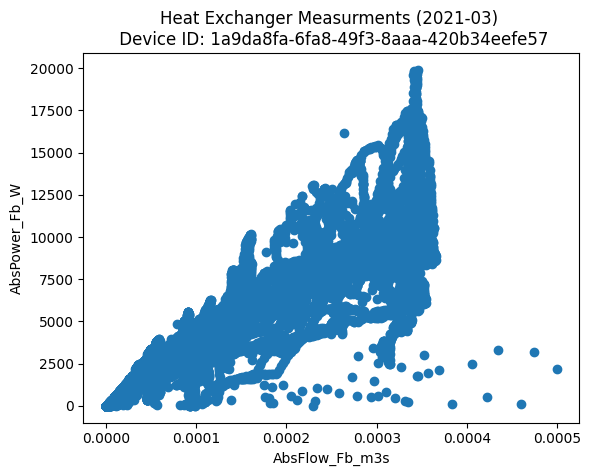

In [41]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

device_id = "1a9da8fa-6fa8-49f3-8aaa-420b34eefe57"
year_month = "202103"
x = "AbsFlow_Fb_m3s"
y = "AbsPower_Fb_W"
df_data = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data").filter((col("device_id") == device_id) & (col("year_month") == year_month)).toPandas()
year_month = year_month[:4] + '-' + year_month[4:]
plt.scatter(df_data[x], df_data[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title(f"Heat Exchanger Measurments ({year_month}) \n Device ID: {device_id}")
plt.show()

### Table 3
Cloud api logs describing interactions with our cloud.

In [42]:
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.cc_api_logs").limit(3)
df.toPandas()

25/03/19 23:04:09 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.cc_api_logs_66bf9243f754b97b405b3403cb2a3ed13dc24e5c4cc79463952a1cbf0b0ff745/_delta_log/00000000000000000000.json.
25/03/19 23:04:09 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.cc_api_logs_66bf9243f754b97b405b3403cb2a3ed13dc24e5c4cc79463952a1cbf0b0ff745/_delta_log.
                                                                                

,api,class,cloudEnv,component,correlationId,developmentDevice,durationInMs,host,httpStatus,logEnv,...,principal,requestId,requestURI,requestURL,signature,signatureFull,signatureId,threadName,userAgent,timestamp
0,device,None,production,core-cloud,CCB:9ae22714-7c8c-4490-8f07-d5fd7793b6cf,NaN,119,logsearch-lifeline-agent-stateful-0.logsearch-...,401,production,...,None,a3818cc09b0af2d7c72134ca5fa93eda,/device-api/registration,https://connect.g2bcc.com/device-api/registration,None,None,None,http-nio-8080-exec-29,"sharedlogic/3.22.5-0 (bsp 10.8.0-0, model 1.2....",2025-01-16 08:45:23.365
1,device,DeviceApiV2DeviceController,production,core-cloud,CCB:fc660e65-b629-4ca1-9adc-ac91cd3fb090,NaN,24,logsearch-lifeline-agent-stateful-0.logsearch-...,200,production,...,4d284824-f2dc-4e47-9641-9c4bd115fbab,db0062793fb9ee45787e4588891f15dc,/device-api/v2/devices/8acbcbb2-0649-429b-b09b...,https://connect.g2bcc.com/device-api/v2/device...,DeviceApiV2DeviceController.getTaskList(String...,ch.belimo.cloud.server.deviceapi.v2.DeviceApiV...,111elm3x3ote5,http-nio-8080-exec-93,,2025-01-16 08:45:23.450
2,device,DeviceApiV2DeviceController,production,core-cloud,CCB:6cb197c0-6be1-4e49-82f4-90539ab6ded2,NaN,23,logsearch-lifeline-agent-stateful-0.logsearch-...,200,production,...,d68a34f0-379c-4534-84e9-0278b8539c11,93df335640a41a3e4b1ecc00a4e58304,/device-api/v2/devices/fec4211e-1d9a-41c8-820d...,https://connect.g2bcc.com/device-api/v2/device...,DeviceApiV2DeviceController.getTaskList(String...,ch.belimo.cloud.server.deviceapi.v2.DeviceApiV...,111elm3x3ote5,http-nio-8080-exec-146,,2025-01-16 08:45:23.452
